In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


url_customers = 'customers.csv'
url_bureau_data = 'bureau_data.csv'
url_loans = 'loans.csv'
df_customers = pd.read_csv(url_customers)
df_bureau_data = pd.read_csv(url_bureau_data)
df_loans = pd.read_csv(url_loans)

pd.options.display.float_format = '{:.0f}'.format


df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [2]:
df_loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [3]:
df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [4]:
df_bureau_data.head(2)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4


In [5]:
df = pd.merge(df, df_bureau_data)
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [7]:
df['default'] = df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['default'], axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [9]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [10]:
df_train.residence_type.unique()


array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [11]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [12]:
df_train['residence_type'].fillna(mode_residence, inplace=True)
df_train.residence_type.unique()


C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\1861392032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(mode_residence, inplace=True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [13]:
df_test['residence_type'].fillna(mode_residence, inplace=True)
df_test.residence_type.unique()

C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\4237504010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(mode_residence, inplace=True)


array(['Owned', 'Rented', 'Mortgage'], dtype=object)

In [14]:
df_train.duplicated().sum()

np.int64(0)

In [15]:
numeric_columuns = df_train.select_dtypes(['float64', 'int64']).columns
numeric_columuns_plot = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', ]

In [16]:
categorical_columns = df_train.select_dtypes(['object', 'category']).columns
categorical_columns_plot = [ 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state',  'loan_purpose',
       'loan_type']

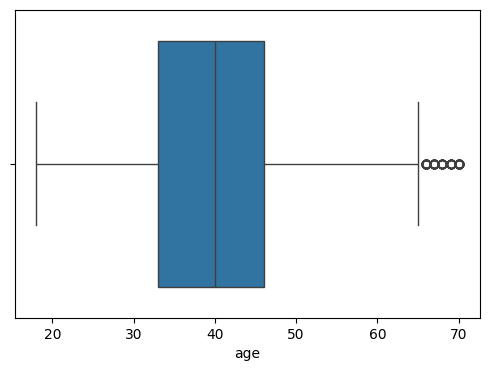

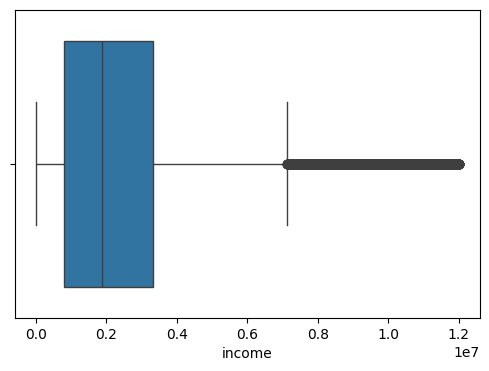

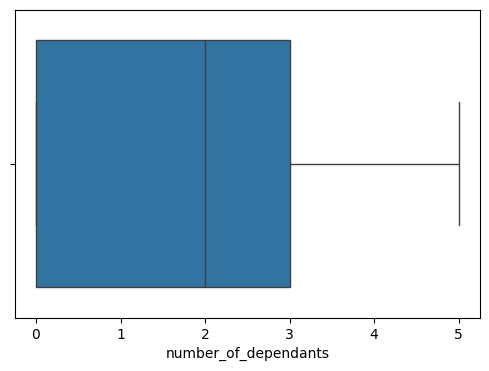

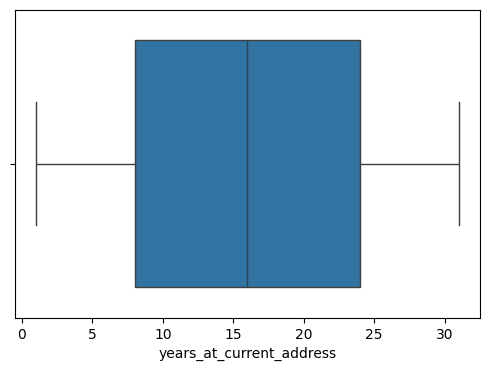

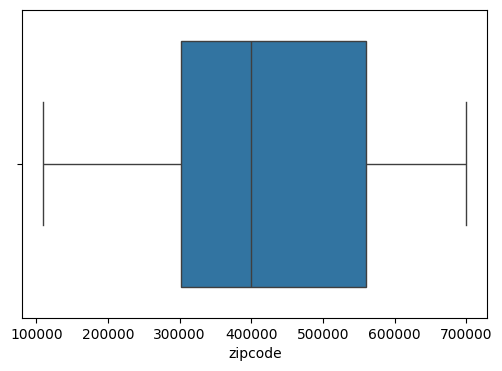

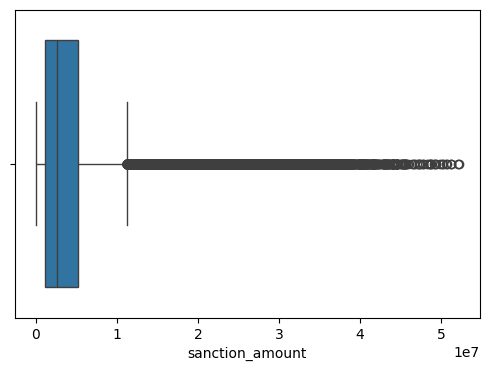

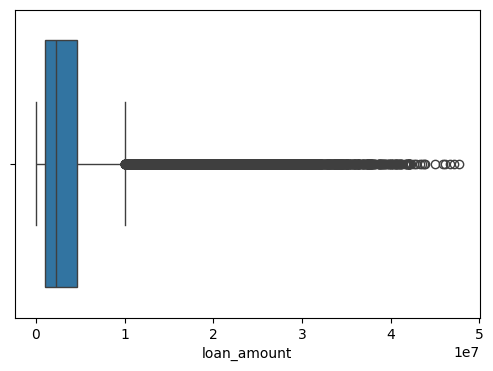

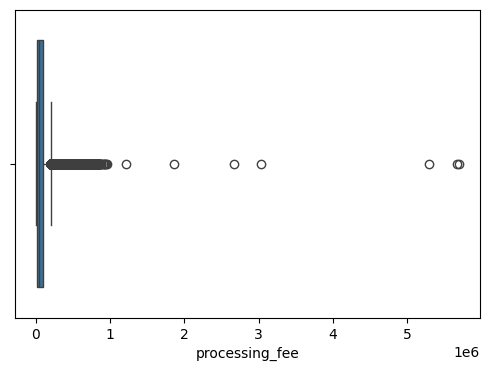

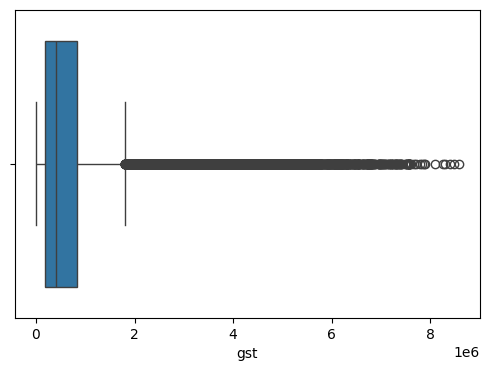

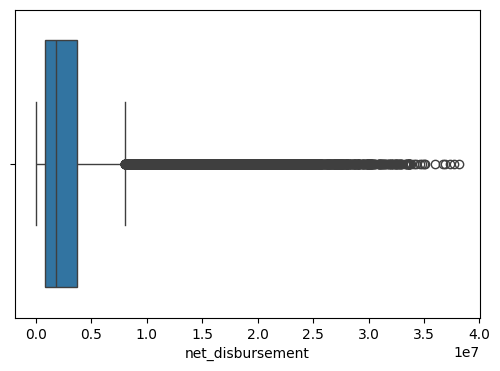

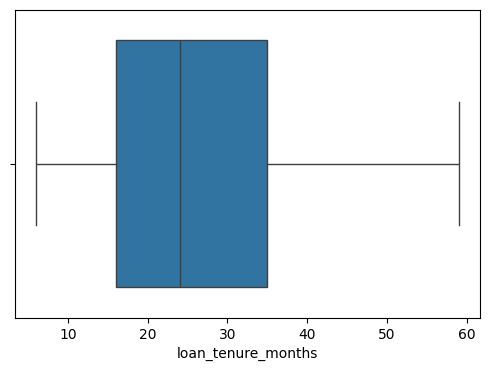

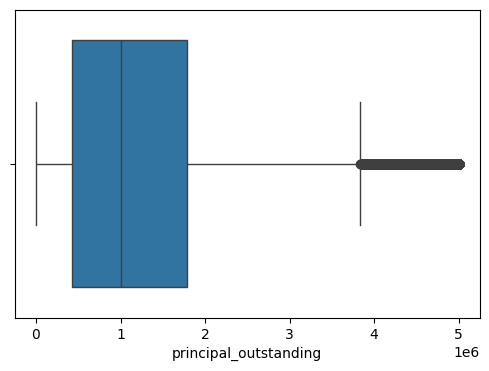

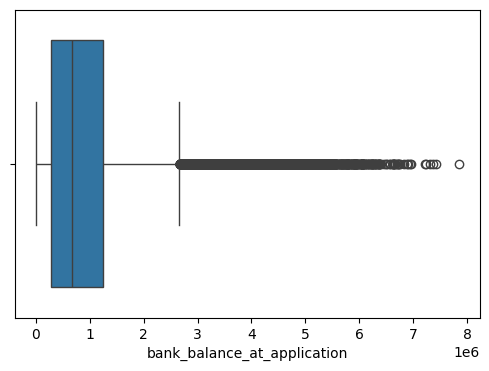

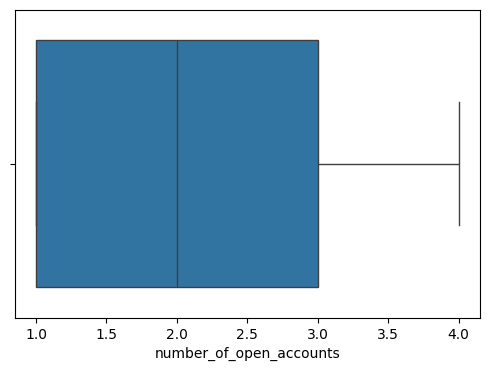

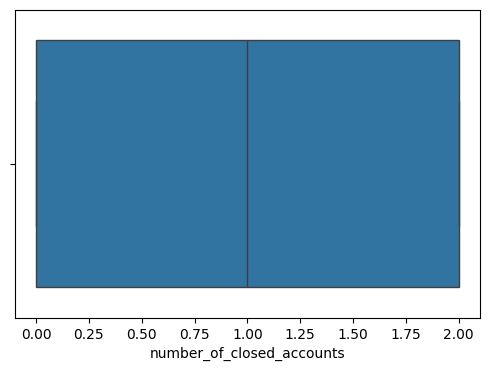

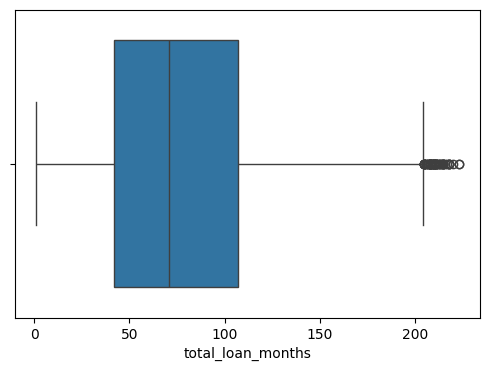

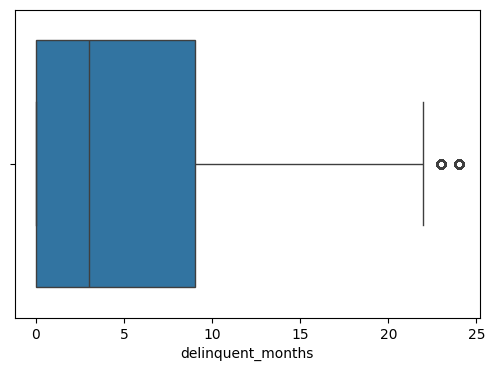

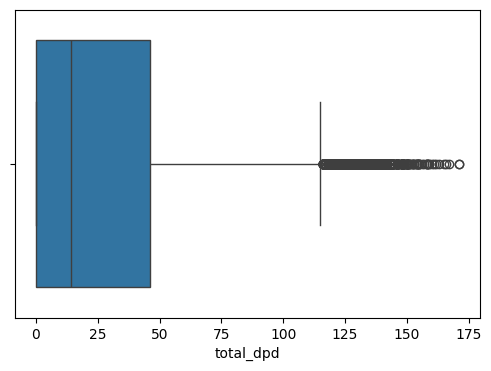

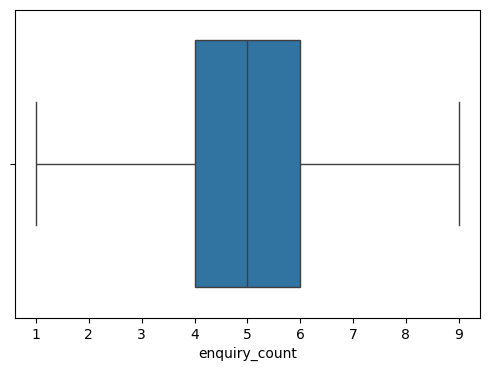

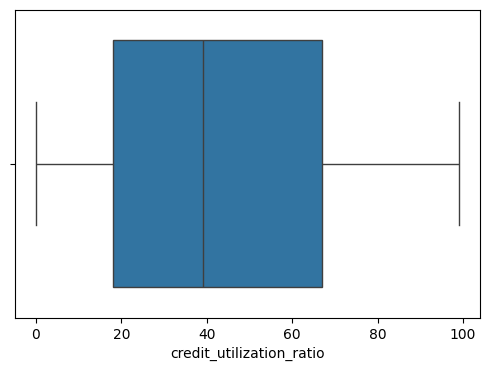

In [17]:
for col in numeric_columuns_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_train[col])
    plt.show()

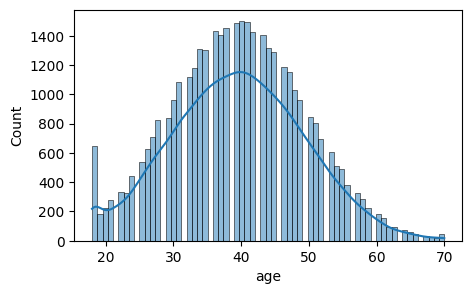

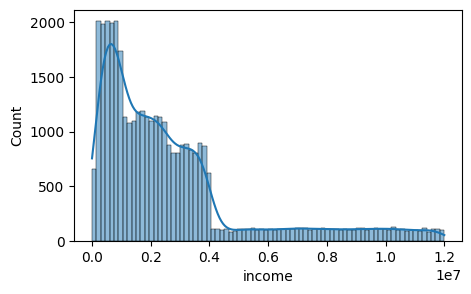

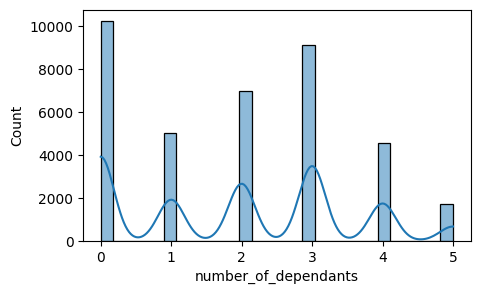

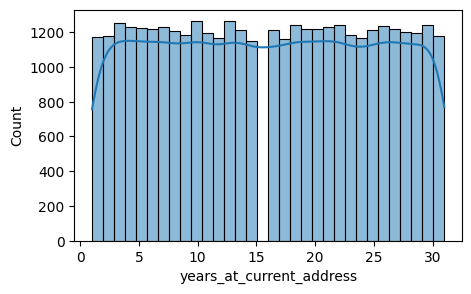

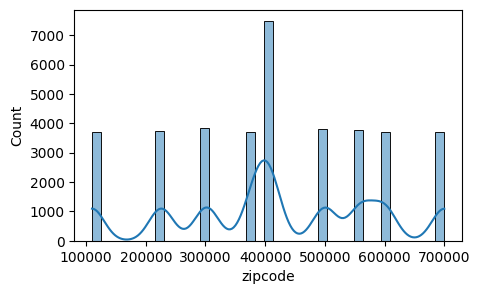

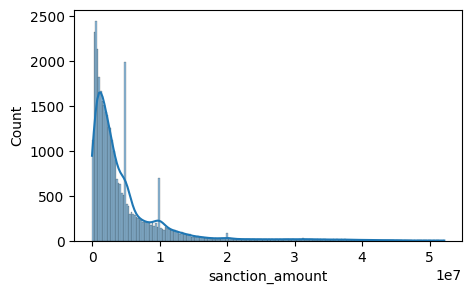

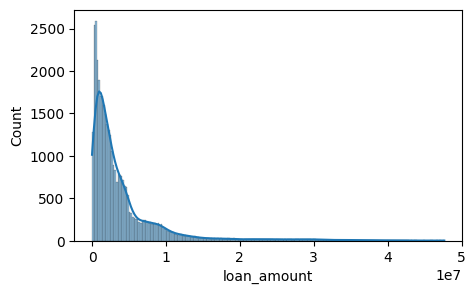

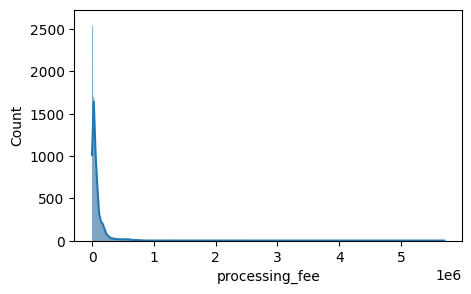

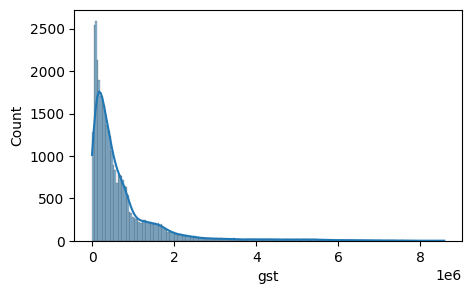

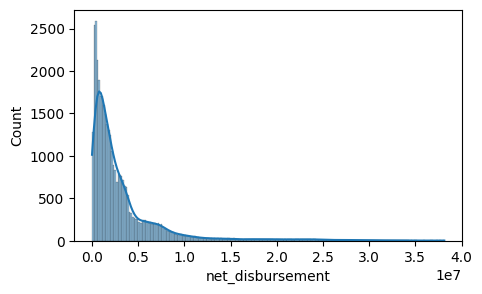

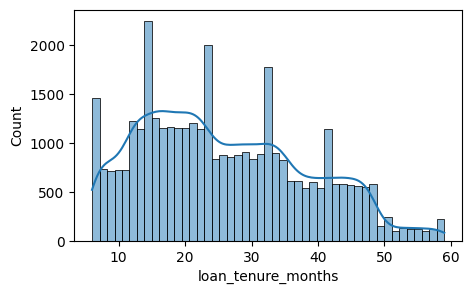

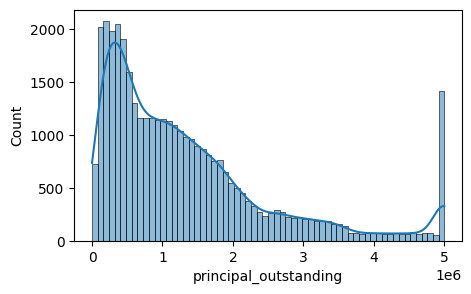

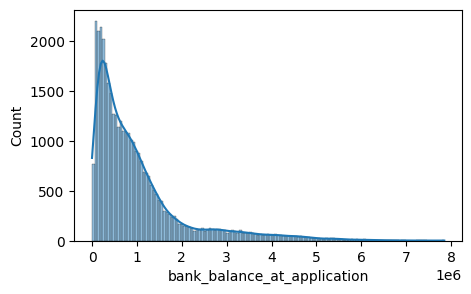

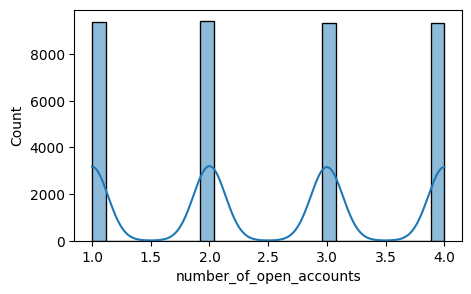

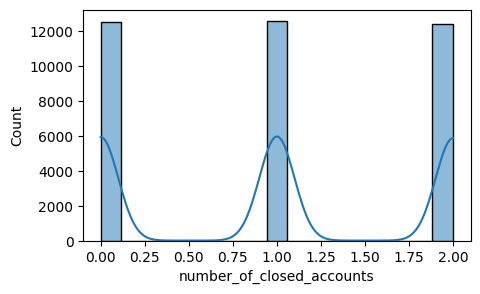

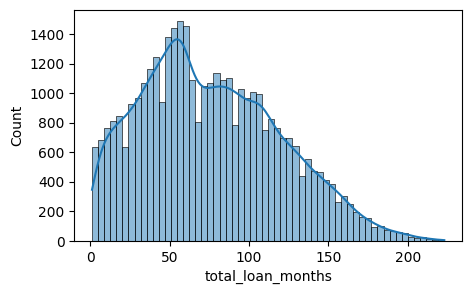

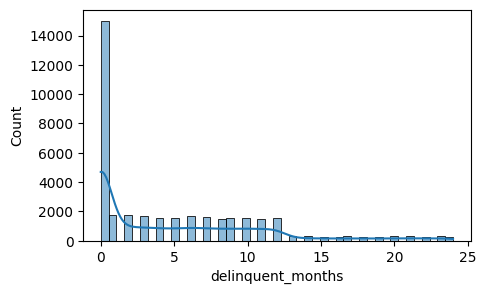

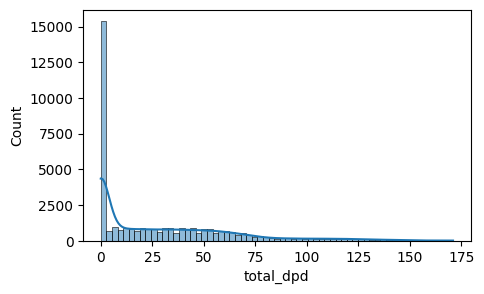

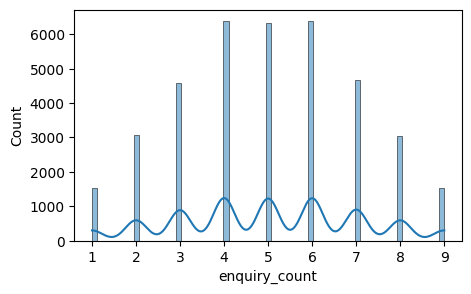

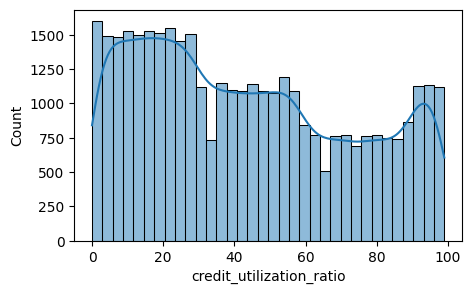

In [18]:
for col in numeric_columuns_plot:
    plt.figure(figsize=(5, 3))
    sns.histplot(x=df_train[col], kde=True)
    plt.show()

In [19]:
df_train['processing_fee'].describe()

count     37500
mean      80724
std      120831
min           0
25%       19180
50%       44700
75%       92000
max     5698030
Name: processing_fee, dtype: float64

In [20]:
df_train[df_train['processing_fee']>df_train['loan_amount']][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791
9898,3626000,5293544
47089,1738000,1858965
33705,3812000,5678021
12294,4639000,5698030
28174,966000,1214493
29305,2616000,3036378


In [21]:
##3% for processing fee thresold 

df_train[(df_train['processing_fee']/df_train['loan_amount'])>0.03][['loan_amount', 'processing_fee']]


,loan_amount,processing_fee
23981,2234000,2669791
9898,3626000,5293544
47089,1738000,1858965
33705,3812000,5678021
12294,4639000,5698030
28174,966000,1214493
29305,2616000,3036378


In [22]:
df_train_1 = df_train[(df_train['processing_fee']/df_train['loan_amount'])<0.03].copy()
df_train_1[(df_train_1['processing_fee']/df_train_1['loan_amount'])>0.03][['loan_amount', 'processing_fee']]


,loan_amount,processing_fee


In [23]:
df_test_1 = df_test[(df_test['processing_fee']/df_test['loan_amount'])<0.03].copy()
df_test_1.shape

(12498, 33)

In [24]:
for col in categorical_columns_plot:
    print(col, "-->", df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']


In [25]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

<h3 align="center" style="color: blue">Exploratory Data Analysis</h3>

In [1]:
sns.kdeplot(df_train[df_train.default==0]['age'], fill=True, label="Default=0")
sns.kdeplot(df_train[df_train.default==1]['age'], fill=True, label="Default=1")
plt.title(f"Age KDE plot with Hue by default")
plt.legend()
plt.show()

NameError: name 'sns' is not defined

Insights
1. orange Graph is little bit shifted to the left to blue graph which indicates that people with young age are more likely to default

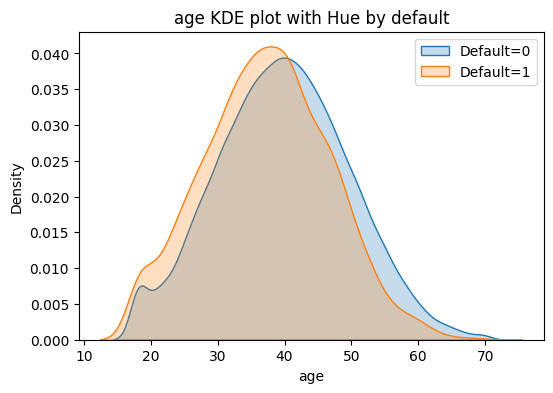

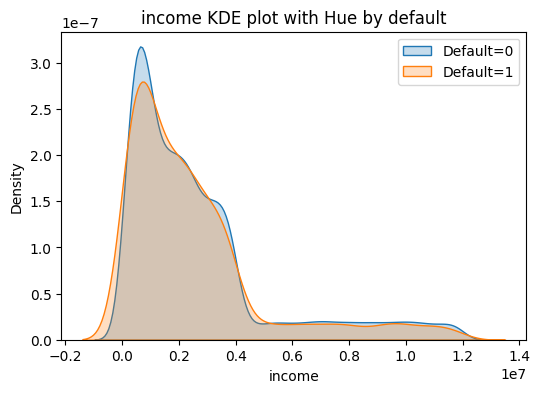

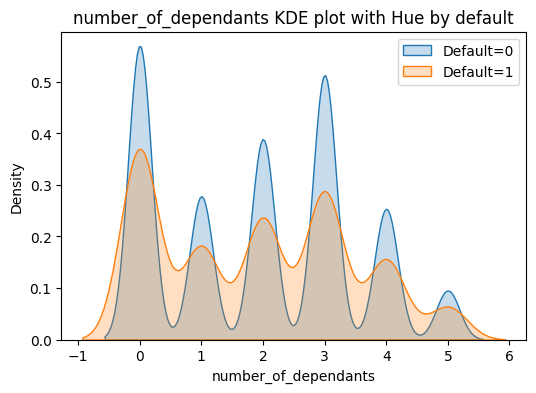

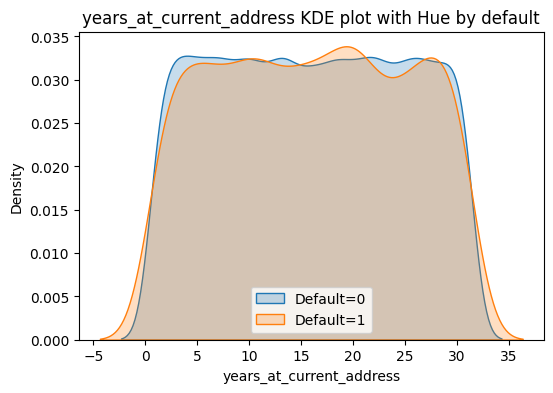

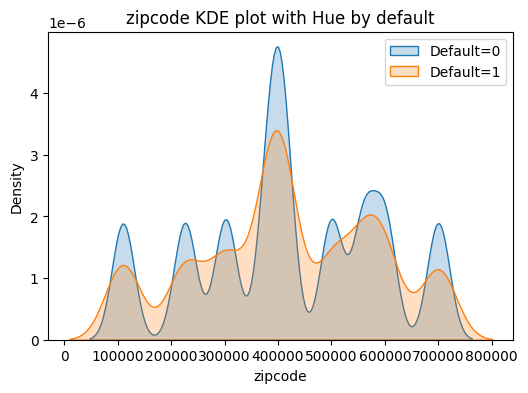

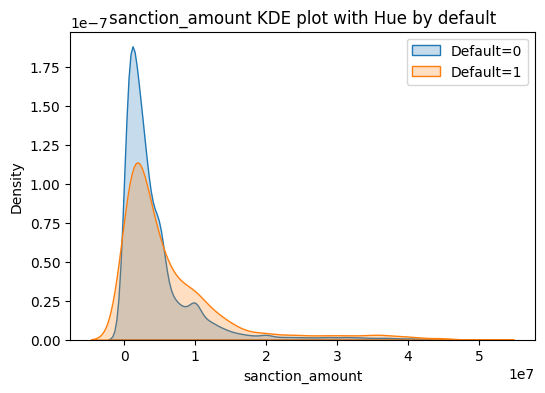

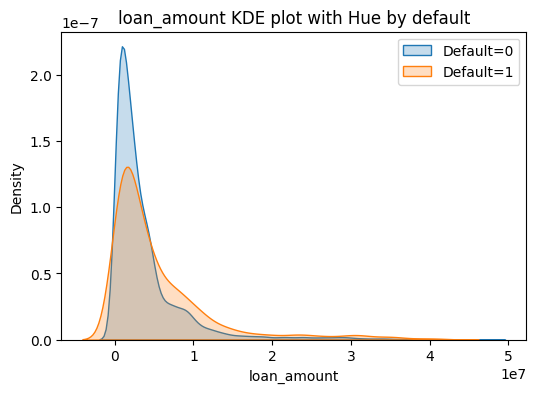

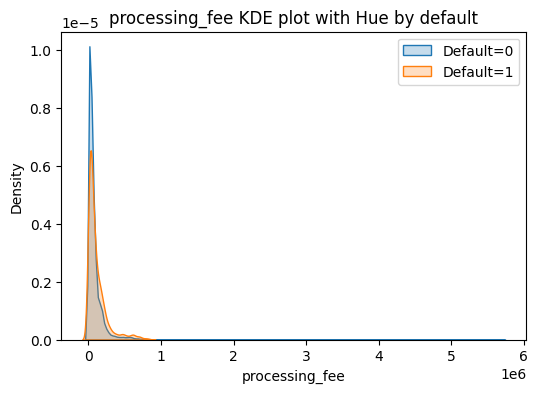

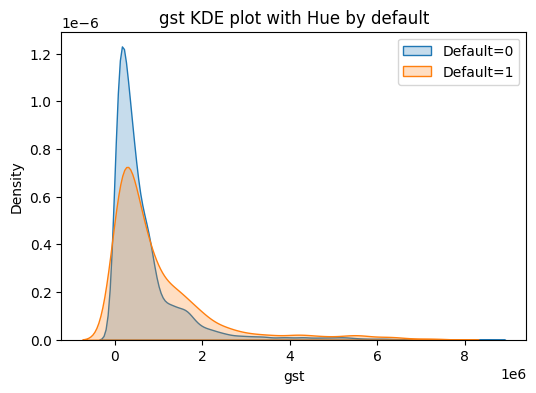

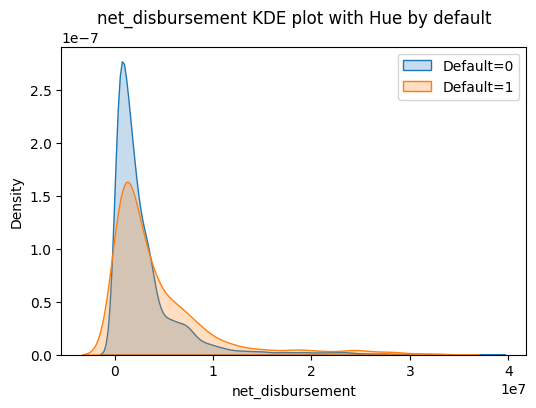

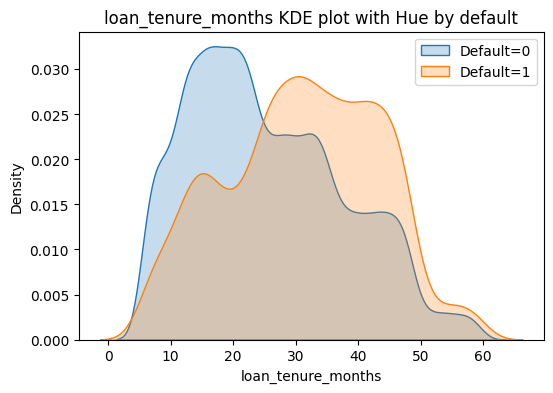

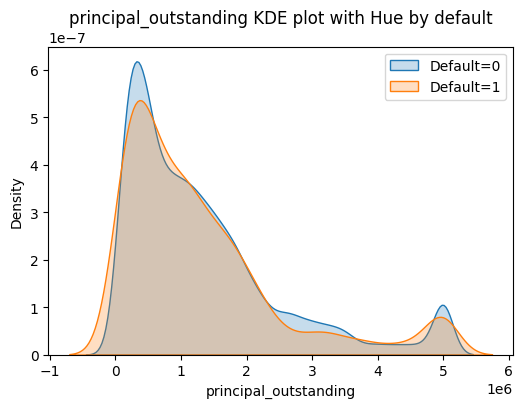

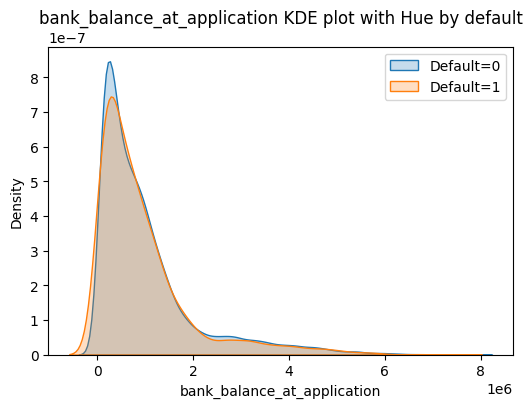

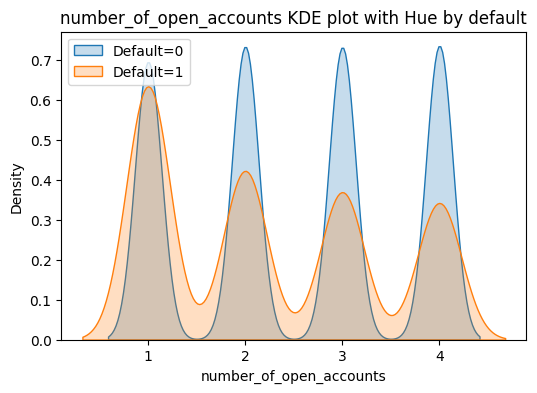

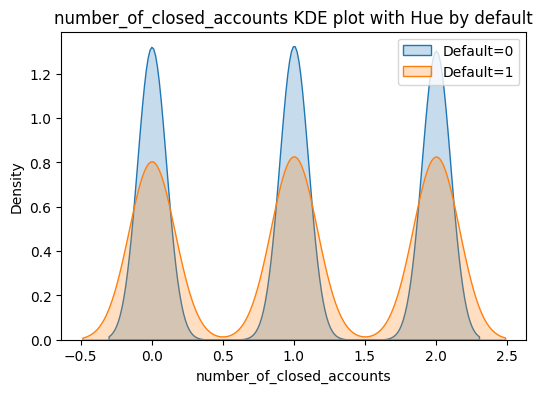

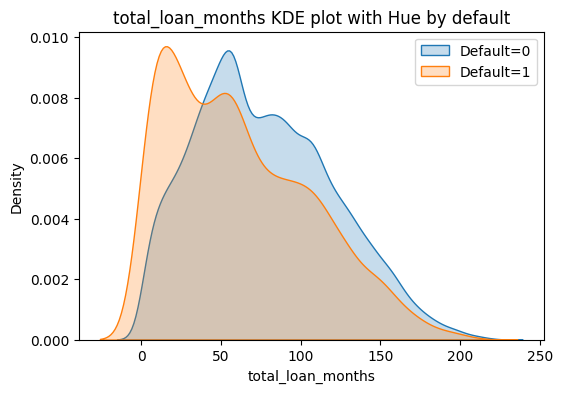

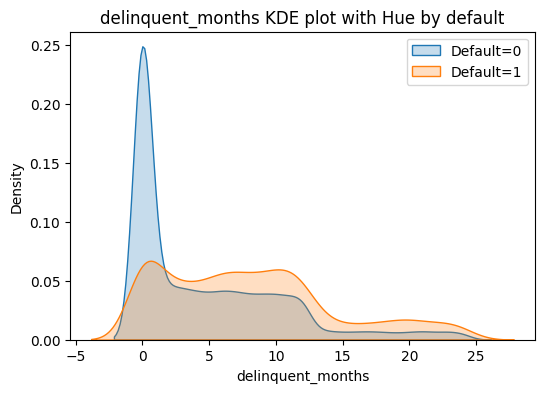

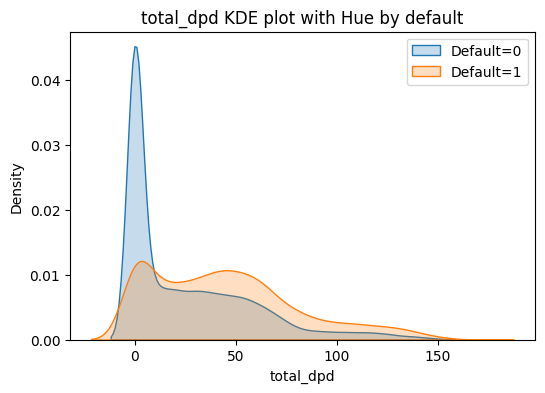

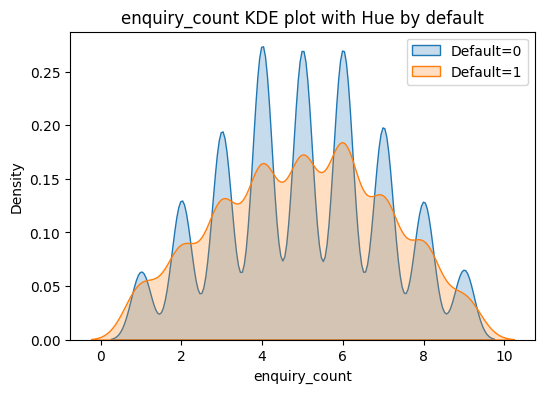

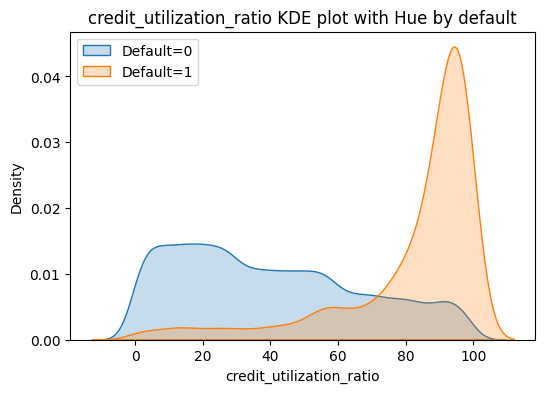

In [27]:
for col in numeric_columuns_plot:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df_train[df_train.default==0][col], fill=True, label="Default=0")
    sns.kdeplot(df_train[df_train.default==1][col], fill=True, label="Default=1")
    plt.title(f"{col} KDE plot with Hue by default")
    plt.legend()
    plt.show()

Insights
1. In columns : loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a deafult.
    Hence this 4 looks like strong predictors
2. In remaining columns the distrubution do not give any obvious insights
3. why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two two and get loan to income ratio 
    that may have influence on the target variable. we will explore more later

<h3 align="center" style="color: blue"> Feature Engineering <h3/>

In [28]:

pd.options.display.float_format = '{:.2f}'.format


In [29]:
df_train_1["loan_to_income"] = df_train_1["loan_amount"] / df_train_1["income"]
df_train_1["loan_to_income"].describe()

df_test_1["loan_to_income"] = df_test_1["loan_amount"] / df_test_1["income"]


C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\895287615.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(df_train_1[df_train.default==0]['loan_to_income'], fill=True, label="Default=0")
C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\895287615.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(df_train_1[df_train.default==1]['loan_to_income'], fill=True, label="Default=1")


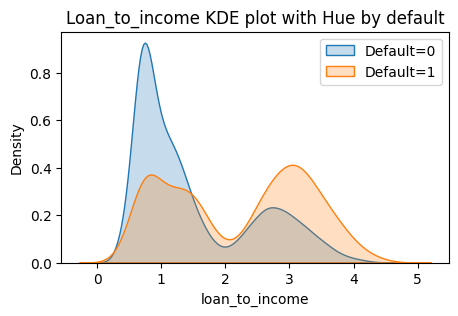

In [30]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df_train_1[df_train.default==0]['loan_to_income'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train.default==1]['loan_to_income'], fill=True, label="Default=1")
plt.title(f"Loan_to_income KDE plot with Hue by default")
plt.legend()
plt.show()

In [31]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [32]:
df_train_1["delinquency_ratio"] = df_train_1["delinquent_months"] * 100/ df_train_1["total_loan_months"]
df_train_1[["delinquency_ratio","delinquent_months", "total_loan_months"]].head(2)

,delinquency_ratio,delinquent_months,total_loan_months
27434,6.67,6,90
13400,3.36,4,119


In [33]:
df_test_1["delinquency_ratio"] = df_test_1["delinquent_months"] * 100/ df_test_1["total_loan_months"]
df_test_1[["delinquency_ratio","delinquent_months", "total_loan_months"]].head(2)


,delinquency_ratio,delinquent_months,total_loan_months
33553,4.29,3,70
9427,0.00,0,115


C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\3696737622.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(df_train_1[df_train.default==0]['delinquency_ratio'], fill=True, label="Default=0")
C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\3696737622.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(df_train_1[df_train.default==1]['delinquency_ratio'], fill=True, label="Default=1")


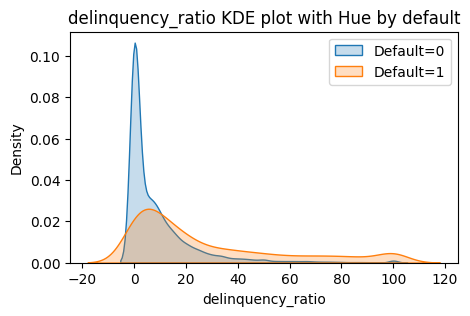

In [34]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df_train_1[df_train.default==0]['delinquency_ratio'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train.default==1]['delinquency_ratio'], fill=True, label="Default=1")
plt.title(f"delinquency_ratio KDE plot with Hue by default")
plt.legend()
plt.show()

In [35]:
df_train_1["avg_dpd_per_delinquency"] = np.where(df_train_1["delinquent_months"]!=0,
df_train_1["total_dpd"] / df_train_1["delinquent_months"],0)
df_train_1["avg_dpd_per_delinquency"].describe()

df_test_1["avg_dpd_per_delinquency"] = np.where(df_test_1["delinquent_months"]!=0,
df_test_1["total_dpd"] / df_test_1["delinquent_months"],0)
df_test_1["avg_dpd_per_delinquency"].describe()

count   12498.00
mean        3.31
std         2.91
min         0.00
25%         0.00
50%         4.33
75%         5.75
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

In [36]:
df_train_1["avg_dpd_per_delinquency"].isna().sum()
df_test_1["avg_dpd_per_delinquency"].isna().sum()


np.int64(0)

C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\1260914966.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(df_train_1[df_train.default==0]['avg_dpd_per_delinquency'], fill=True, label="Default=0")
C:\Users\prashant\AppData\Local\Temp\ipykernel_16876\1260914966.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(df_train_1[df_train.default==1]['avg_dpd_per_delinquency'], fill=True, label="Default=1")


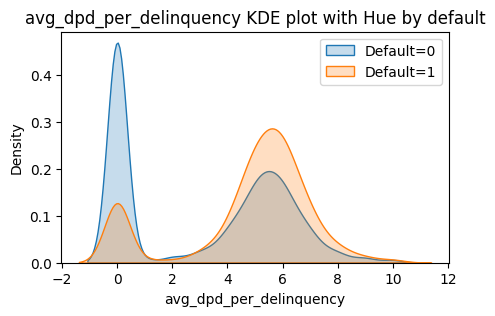

In [37]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df_train_1[df_train.default==0]['avg_dpd_per_delinquency'], fill=True, label="Default=0")
sns.kdeplot(df_train_1[df_train.default==1]['avg_dpd_per_delinquency'], fill=True, label="Default=1")
plt.title(f"avg_dpd_per_delinquency KDE plot with Hue by default")
plt.legend()
plt.show()

## Feature Selection

In [38]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [39]:
df_train_2 = df_train_1.drop(["cust_id", "loan_id"], axis=1)
df_test_2 = df_test_1.drop(["cust_id", "loan_id"], axis=1)



In [40]:
df_train_3 = df_train_2.drop(["disbursal_date", "installment_start_dt", "loan_amount", "income", "total_loan_months", "delinquent_months", "total_dpd"],
                            axis=1)
df_test_3 = df_test_2.drop(["disbursal_date", "installment_start_dt", "loan_amount", "income", "total_loan_months", "delinquent_months", "total_dpd"],
                            axis=1)
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [41]:
numeric_columns =df_train_3.select_dtypes(include=["float64", "int64"]).columns

numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [42]:
X_train = df_train_3.drop(["default"], axis=1)
y_train = df_train_3['default']


In [43]:

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [col for col in numeric_columns if col != "default"]


scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.51,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [44]:
X_test = df_test_3.drop(["default"], axis=1)
y_test = df_test_3['default']
X_test.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [45]:
cols_to_scale = [col for col in numeric_columns if col != "default"]

scaler = MinMaxScaler()

X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.14,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.13,0.11,0.11,0.11,0.24,0.25,0.15,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.04,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.09,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.18,1.00,1.00,0.75,0.68,0.50,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [46]:
##calculating variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [47]:
calculate_vif(X_train[cols_to_scale])

C:\Users\prashant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [48]:
features_to_drop_dueto_vif = ["sanction_amount","processing_fee","gst","net_disbursement", "principal_outstanding"]

X_train_1 = X_train.drop(features_to_drop_dueto_vif, axis=1)
numeric_column1 = X_train_1.select_dtypes(["Float64", "int64"]).columns
numeric_column1

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [49]:
vif_df = calculate_vif(X_train_1[numeric_column1])
vif_df

,Column,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [50]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

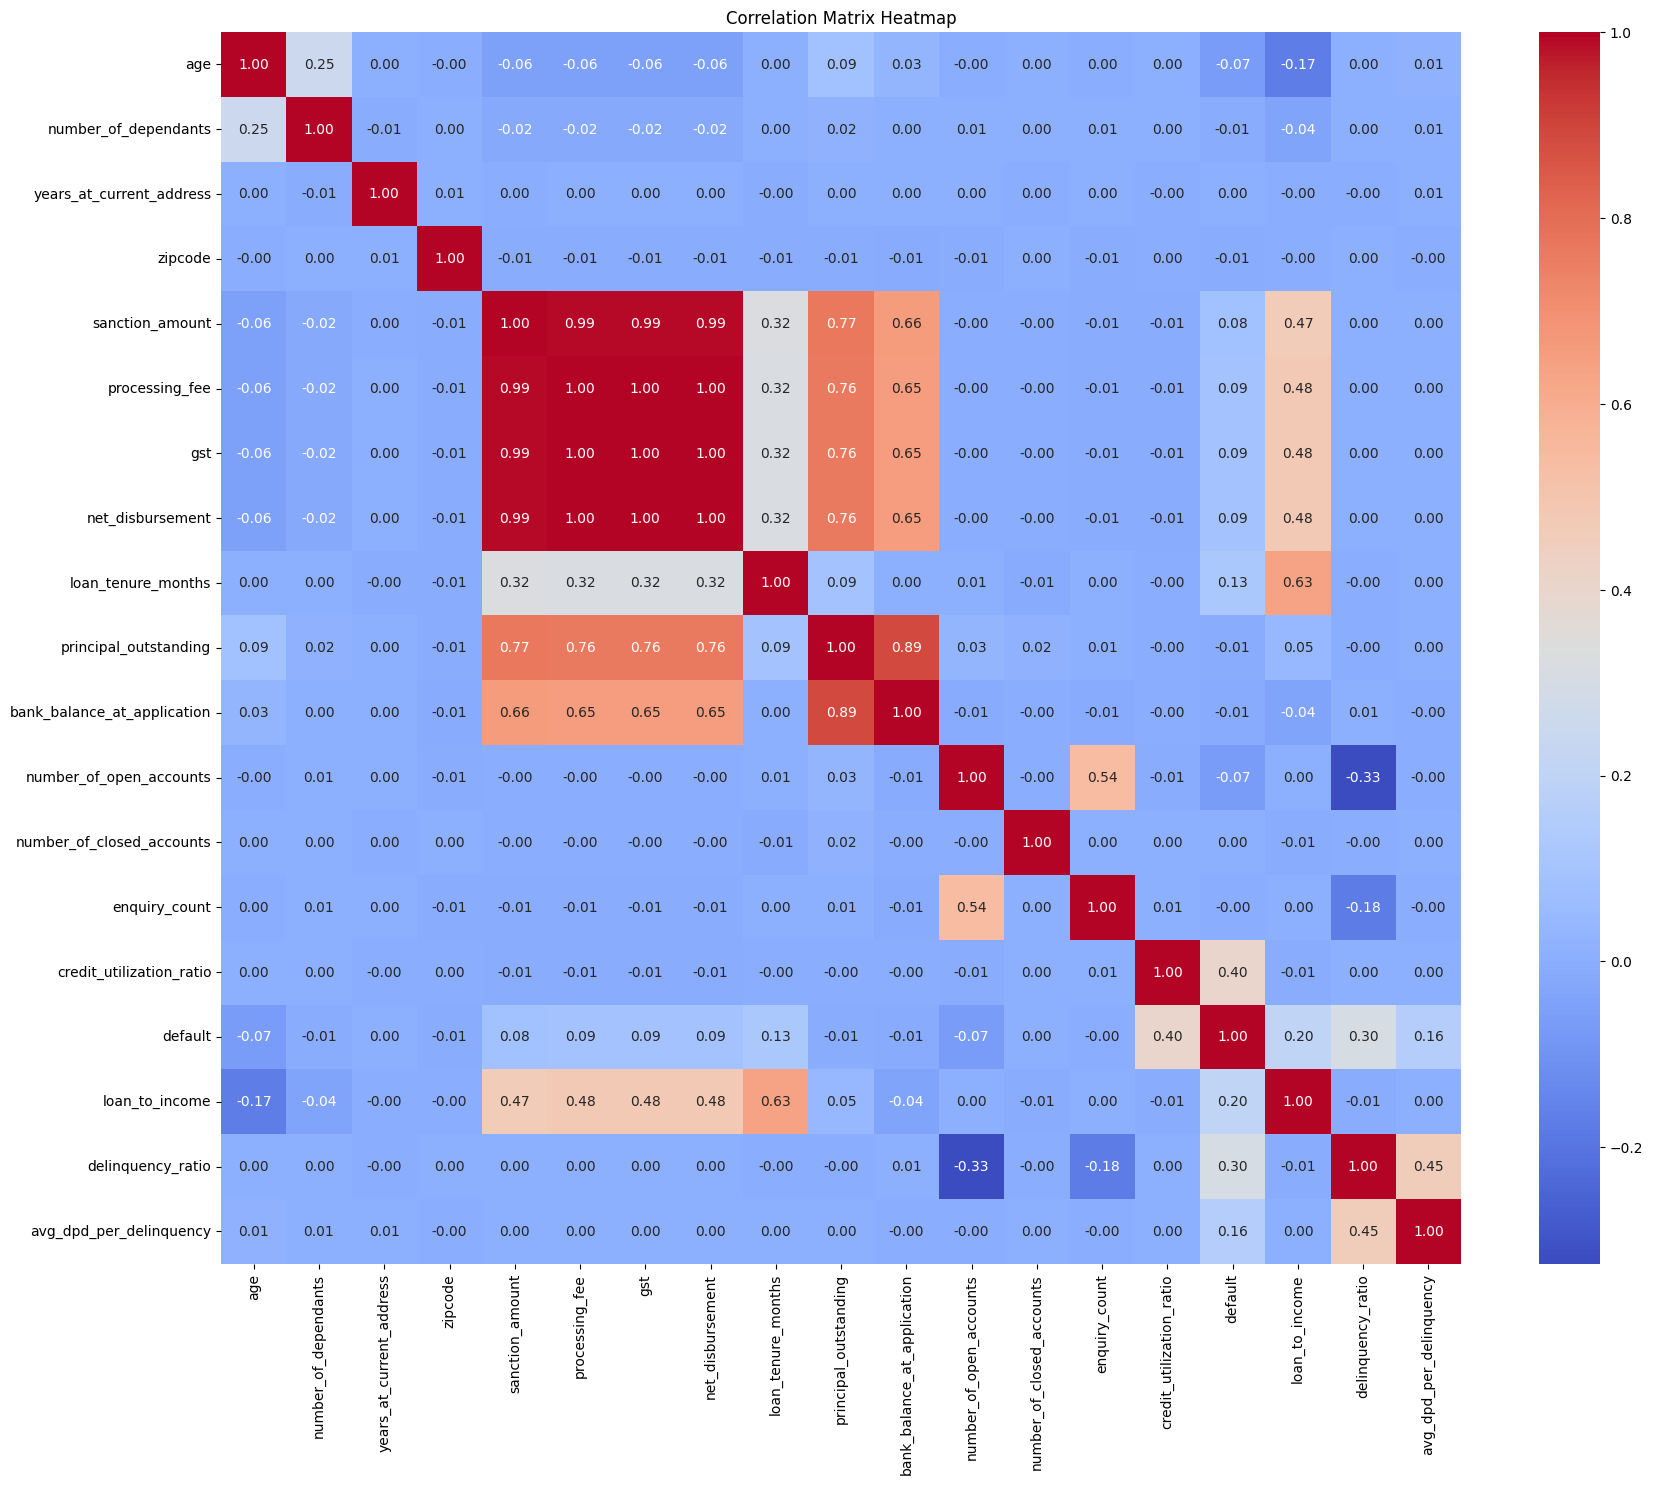

In [51]:
##correlation matrix

cm = df_train_3.corr(numeric_only=True)
plt.figure(figsize=(20,16))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [52]:
categorical_columns_plot

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_purpose',
 'loan_type']

In [53]:
##need to make temparary df for the calculation of weight of evidence and information value

temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [54]:
##calculating weight of evidence and information value

def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum' : 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct'] / grouped['bad_pct'])
    grouped['iv'] = grouped['woe']*(grouped['good_pct'] - grouped['bad_pct'])
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv
    
    
total_iv, grouped = calculate_woe_iv(temp, 'loan_purpose', 'default')
grouped

np.float64(0.39377543144164784)

In [55]:
total_iv

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [56]:
## NOTE: Although we calculate woe and iv values for categorical comns but we can calculate this for numeric columns also if we bin the values it 

In [57]:

total_iv_values={}
for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _ , total_iv = calculate_woe_iv(temp, feature, 'default')
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        temp2 = pd.concat([X_binned, y_train], axis=1)
        _ , total_iv = calculate_woe_iv(temp2, feature, 'default')
        
    total_iv_values[feature] = total_iv

total_iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4917403

In [58]:
pd.options.display.float_format = '{:.3f}'.format


iv_df = pd.DataFrame(list(total_iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


# Insights
1. If the Information Value  of a feature is less than 0.02, 
it indicates that the feature has no meaningful predictive power and can be considered insignificant for the model
2. so we are going to consder feature selection for further process based upon the values of  Information Value

In [59]:
selected_features_iv = [ feature for feature, iv in total_iv_values.items() if iv > 0.02]  
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

## Feature Encoding

In [60]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]


In [61]:
X_train_reduced.head(2)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.185,0.034,0.425


In [62]:
X_test_reduced.head(2)

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
33553,0.346,Owned,Education,Secured,0.528,0.333,0.121,0.256,0.043,0.900
9427,0.288,Owned,Home,Secured,0.623,1.000,0.859,0.685,0.000,0.000


In [63]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

X_train_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.185,0.034,0.425,True,False,False,False,False,False


<h3 align="center" style="color: blue">Model Training</h3>


# ATTEMP1
1.LogisticRegression, RandomForest & XGB 
2.No handling of class imbalance

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_model  = LogisticRegression()
log_model .fit(X_train_encoded, y_train)
y_pred_log  = log_model .predict(X_test_encoded)

cr = classification_report(y_test, y_pred_log )
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier()
rf_model .fit(X_train_encoded, y_train)
y_pred_rf  = rf_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_rf )
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [66]:
from xgboost import XGBClassifier

xgb_model  = XGBClassifier()
xgb_model.fit(X_train_encoded, y_train)
y_pred_xgb  = xgb_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_xgb )
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.73      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [67]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C':np.logspace(-4, 4, 20),
    'solver' : ['lbfgs', 'saga', 'liblinear', 'newton-cg']
    
}

log_reg = LogisticRegression(max_iter=10000)

random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=50, scoring='f1',
                cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train_encoded, y_train)
print(f'Best parameters : {random_search.best_params_}' )
print(f'Best score :  {random_search.best_score_}')

best_model = random_search.best_estimator_
y_pred_rscv = best_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_rscv )
print(cr)


Best parameters : {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best score :  0.7629892080748256
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



# Attempt 2
1.LogisticRegression & XGB
2.Handle class imbalance using under sampling

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()


default
0    3189
1    3189
Name: count, dtype: int64

In [69]:
log_model  = LogisticRegression()
log_model .fit(X_train_rus, y_train_rus)
y_pred_log  = log_model .predict(X_test_encoded)

cr = classification_report(y_test, y_pred_log )
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [70]:
xgb_model  = XGBClassifier()
xgb_model.fit(X_train_rus, y_train_rus)
y_pred_xgb  = xgb_model.predict(X_test_encoded)

cr = classification_report(y_test, y_pred_xgb )
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.58      0.95      0.72      1108

    accuracy                           0.94     12498
   macro avg       0.79      0.94      0.84     12498
weighted avg       0.96      0.94      0.94     12498



# Attemp3
1. LogisticRegression
2. Handle Class imbalance using SMOTE Tomek
3. Parameter tuning using optuna

In [71]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34226
1    34226
Name: count, dtype: int64

In [73]:
log_model_smt  = LogisticRegression()
log_model_smt .fit(X_train_smt, y_train_smt)
y_pred_log  = log_model_smt .predict(X_test_encoded)

cr = classification_report(y_test, y_pred_log )
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [ ]:
## Note: Since our logisticregression model is giving us the best results we are going with it.


In [74]:
best_model = log_model_smt


In [87]:
## to get probabilities into floating point number

import numpy as np
np.set_printoptions(suppress=True, precision=8)



In [91]:
from sklearn.metrics import roc_curve

probabilities = best_model.predict_proba(X_test_encoded)
positive_probabilities = probabilities[:, 1]

fpr, tpr, thresolds = roc_curve(y_test, positive_probabilities)

In [93]:
from sklearn.metrics import auc
area = auc(fpr, tpr)
area

0.9830239332114116

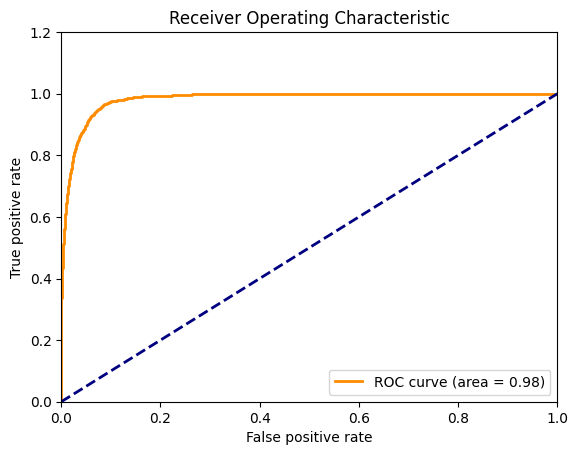

In [97]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)'% area)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Insights 

1. Our AUC–ROC score is 98%, which shows the model has excellent ability to distinguish between classes. At this level, 
only very small improvements are possible, and the model is already performing near its maximum potential.

<h3 align="center" style="color: blue"> Conclusion</h3>


Our analysis shows that Logistic Regression delivers the strongest and most reliable performance, achieving an excellent 98% AUC–ROC score.
Based on this result, we selected Logistic Regression as our final model for the project.